In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import imageio
import scipy as sp

from mpl_toolkits import mplot3d

from scipy.optimize import curve_fit
from PIL import Image

from scipy.special import softmax
import imageio
#np.set_printoptions(precision=1)
%matplotlib notebook
#plt.close('all')

In [47]:
def make_nodefeature(x,y,r,t):
    A=np.zeros((len(x),2))
       
    
    



def make_adjacency(x,y,r,t,ide,split_id,run):
    A=np.zeros((len(x),len(x)))
    x_id = []
    t_id = []
    for i in range(len(x)):
        x_id.append(i+1)
        t_id.append(t[i])
        for j in range(len(x)):
            if ide[i]==ide[j] and ide[i]!=-2:
                if t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
            elif ide[i]==split_id[j]:
                if ide[i]==-1:
                    A[i,j]=1
                elif t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
              
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'timetable.txt',np.c_[x_id,t_id], fmt='%i',delimiter='\t')
    
    return A
        

    
def make_weighted_adj_estimate(x,y,t,run):
    
    #emb without void node
    
    x=x[1:]
    y=y[1:]
    t=t[1:]
    
    #############
    
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            #A[i,0]=1.5  ####
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=gaus2d(x[j], y[j], x[i], y[i]) #1/((x[i]-x[j])**2+(y[i]-y[j])**2)
            #if i>j:
                #A[i,j]=0
        if np.sum(A[i,:])!=0:
            A[i,:]=mean_normal(A[i,:])
        #print(A[i,:],i)
       
    A=A.round(decimals=2)
    
    np.savetxt('./'+str(run)+'/'+'B.txt', A)
    return A
    
    
def make_dist_matrix(x,y,t,run):
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
       
    
    
    np.savetxt('./'+str(run)+'/'+'D.txt', A)
    return A


def make_weighted_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j and j!=0:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                w.append(A[i,j]*100)
    
    
    np.savetxt('./node2vec/graph/'+str(run)+'.edgelist', np.c_[e1,e2,w], fmt='%i',delimiter='\t')
    return A,e1,e2,w



def make_true_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                #w.append(A[i,j])
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.edgelist', np.c_[e1,e2], fmt='%i',delimiter='\t')
    return 0


def mean_normal(x):
    s=np.sum(x)
    return x/s


def gaus2d(x, y, mx, my, sx=0.07, sy=0.07):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))



def padding(maxlen,run):
    #A,B,E
    
    B=np.loadtxt('./'+str(run)+'/'+'B.txt')
    A=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.txt')
    E=np.loadtxt('./'+str(run)+'/'+'embed.txt')
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
                B[i,j]=0
                
    np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    #A=np.zeros((4,4))
    #B=np.zeros((4,4))
    
   #E=np.ones((4,6))
    
    h=np.ones(maxlen)*-1
    v=np.ones(len(A[0]))*-1
    
    #
    cur_E=len(E)
    cur_A=len(A)
    cur_Ah=len(A[0])
    zero_line=np.zeros(len(E[0]))
    for i in range(maxlen-cur_E):
        E=np.vstack([E, zero_line])
        
    for j in range(maxlen-cur_A):
        A=np.vstack([A, v])
        B=np.vstack([B, v])
        
    for z in range(maxlen-cur_Ah):
        A=np.column_stack([A, h])
        B=np.column_stack([B, h])
        
    #np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'B_padded.txt', B)
    np.savetxt('./'+str(run)+'/'+'embed_padded.txt',E)
    print(A.shape)   
    return A,B,E    
    
#x = np.linspace(-5, 5)
#y = np.linspace(-5, 5)
#x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
#z = gaus2d(x, y)

#def correct(A,B,E,max_len,run):



#def A_B_dense(A,B):

def fit_func(x,a,b):
    return a*x+b

def fingerprint_emb(pos_x,pos_y,window,t,run,void_node=True,a_x=113.89266922,b_x=19.51478307,a_y=-114.14194117,b_y=131.3404747):
    x_l,x_r,y_l,y_u=calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window)
    im = blend(run,t)#Image.open(path).convert('L') # Can be many different formats.
    im_crop = im.crop((x_l, y_l, x_r, y_u))
     
    if t==9 and run==95:
        im_crop.show()
    foo = im_crop.resize((10,10),Image.ANTIALIAS)

    imarray = np.asarray(foo)
    imarray=imarray.flatten()/255
    return imarray



def fingerprint_wrap(window,run,void=False):
    pos_x,pos_y,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',usecols=(0,1,6), unpack=True)
    l=len(pos_x)-1
    
    
    f_e = np.array([np.zeros(100)])


    for k in range(int(np.max(t))+1):
        path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(k)+'.png'
        pos_x_n=pos_x[t==k]
        pos_y_n=pos_y[t==k]
        if k==0:
            pos_x_n=pos_x_n[1:]
            pos_y_n=pos_y_n[1:]
        for j in range(len(pos_x_n)):
            imarray=norm_im_array(np.array([fingerprint_emb(pos_x_n[j],pos_y_n[j],window,k,run)]),offset=8.745098039215686292e-01)
            f_e=np.concatenate((f_e, imarray), axis=0)
            
    
    if void==False:
        f_e=f_e[1:]
            
        
    return f_e
    
    
def blend(run,t):
    
    
    
    pathm1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t-1)+'.png'
    path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t)+'.png'
    pathp1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t+1)+'.png'
    
    
    im = Image.open(path).convert('L')
    shape = np.asarray(im).shape
    
    #print(pixels.shape)
    try:
        imm1 = Image.open(pathm1).convert('L')
        pixels = np.asarray(imm1)
        #print(pixels)
        pixels = pixels.astype('float32')
        pixels = pixels/2
        #pixels = pixels.astype('int')
        imm1 = Image.fromarray(pixels).convert('L')
    except:
        pix=255*np.ones(shape)
        pix = pix.astype('float32')
        pix = pix/2
        imm1 = Image.fromarray(pix).convert('L')
        
    try:
        imp1 = Image.open(pathp1).convert('L')
    except:
        pix=255*np.ones(shape)
        imp1 = Image.fromarray(pix).convert('L')
    
    
    
    im3 = Image.blend(imm1, imp1, 0.5)
    im4 = Image.blend(im3, im, 0.5)
    #im4.show()
    return im4
    
    

def norm_im_array(arr,offset):
    return (arr-offset)*10
    
    
    
'''
pos_x=[5.926355409057428858e-01,4.604170197372819962e-01,6.250962551422760416e-02,1.223613241454796496e-01,6.376507269405902179e-01,1.103583087228645621e-01,4.233227679149828004e-01]
pos_y=[5.378065857159227692e-01,5.482527480620434934e-01,1.628245440499290486e-01,8.255699686855265673e-01,5.184511465256566032e-01,1.492480151352687523e-01,5.115442664966730613e-01]
pix_x=[87,72,27,33,92,32,68]
pix_y=[70,69,113,37,72,114,73]


plt.errorbar(pos_y, pix_y,fmt='.')   

popt, pcov = curve_fit(fit_func, pos_y,pix_y)

plt.plot(pos_y, fit_func(np.array(pos_y),*popt))
print(popt)
'''

a_y=-114.14194117
a_x=113.89266922
b_y=131.3404747
b_x=19.51478307
    
def calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window):
    pix_x0=int(fit_func(pos_x,a_x,b_x))
    
    pix_y0=int(fit_func(pos_y,a_y,b_y))
    #print(pix_x0,pix_y0,int(pix_x0-window))
    return int(pix_x0-window),int(pix_x0+window),int(pix_y0-window),int(pix_y0+window)

In [32]:
A=np.loadtxt('./'+str(2)+'/'+'embed.txt')
print(A)

A=np.vstack([A, np.zeros(len(A[0]))])
#A=np.append(A,np.zeros(len(A[0])))
#print(A)


A=np.ones((3,4))
B=np.zeros((3,2))
print(np.c_[A, B])
print(gaus2d(1.8*0.07, 1.8*0.07, 0, 0, sx=0.07, sy=0.07))


#A,B,E =padding(7,1)

#print(E)
#blend(10)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.1570277  -0.22889203  0.9249575  ...  0.          0.
   0.        ]
 [-0.13240676 -0.01963205  0.7208076  ...  0.          0.
   0.        ]
 ...
 [-0.02628691  0.04573042  0.6825458  ...  0.          0.
   0.        ]
 [-0.4448477  -0.00811978  0.38752407 ...  0.          0.
   0.        ]
 [ 0.08471794  0.5418093   0.11368369 ...  0.03921569  0.
   0.        ]]
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]]
1.2720668358645384


In [48]:
lenA=[]
for i in range(1,100):

    run=i

    x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    #print(len(x))
    A=make_adjacency(x,y,r,t,ide,split_id,run)
    print(len(A),i)
    lenA.append(len(A))
    
    B=make_weighted_adj_estimate(x,y,t,run)
    #print(B)
    C,e1,e2,w=make_weighted_edgelist(B,run)
    make_true_edgelist(A,run)
    
    make_dist_matrix(x,y,t,run)
    
maxlen=np.max(lenA)
print(maxlen)






216 1
241 2
221 3
227 4
232 5
213 6
208 7
181 8
223 9
240 10
214 11
173 12
235 13
283 14
240 15
192 16
197 17
254 18
244 19
242 20
191 21
230 22
225 23
252 24
260 25
248 26
210 27
194 28
191 29
206 30
197 31
224 32
237 33
304 34
267 35
218 36
219 37
196 38
209 39
194 40
229 41
245 42
240 43
243 44
225 45
234 46
223 47
255 48
231 49
237 50
208 51
225 52
235 53
207 54
251 55
248 56
232 57
211 58
261 59
198 60
251 61
198 62
228 63
255 64
244 65
219 66
276 67
256 68
250 69
201 70
211 71
247 72
208 73
258 74
221 75
209 76
233 77
227 78
204 79
202 80
234 81
222 82
199 83
224 84
183 85
219 86
216 87
223 88
215 89
261 90
259 91
244 92
209 93
243 94
241 95
266 96
208 97
247 98
230 99
304


In [49]:
#print(stop)

for i in range(1,100):

    run=i

    b = np.loadtxt('./node2vec/emb/'+str(run)+'.emb',skiprows=1, delimiter=' ', unpack=True)
    

    ind=np.argsort(b[0])

    for l in range(len(b)):
        b[l]= np.take_along_axis(b[l], ind,axis=0)  
    b=np.transpose(b)
    b=b[:,1:]
    
    
    ####
    b=np.concatenate((np.array([np.zeros(len(b[0]))]), b), axis=0) #######if void node not included in n2v
    ####
    
    
    f_e=fingerprint_wrap(20,run,void=True)  #always 000000000000000 for fingerprint
    b=np.c_[b, f_e]
    #print(len(f_e),run)
    
    #pos_x,pos_y= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',, unpack=True)
    #id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
    #split_prob = pos.T[:,5]
    #split_prob = split_prob[:, np.newaxis]
    #r = pos.T[:,2]
    #r=r[:, np.newaxis]
    
    #print(b.shape,pos.shape)
    
    #b=np.append(b,r,axis=1)
    #b=np.append(b,split_prob,axis=1)
    
    #np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    
    
    ##remove below if n2v is used
    
    print(len(b[0]),run)
    
    #p = np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', unpack=True)
    #split_prob = p.T[:,5]
    #print(len(split_prob),split_prob)
    #b = b.T[:,0:3]
    #split_prob=split_prob[:, np.newaxis]
    #print(len(b),b)
    
    #print(b.shape,split_prob.shape)
    
    #######b=np.append(b,split_prob,axis=1)
    
    #b=np.append(pos,split_prob,axis=1)
    
    
    #print(b)
    #b=np.repeat(b, 6, axis=1)
    #print(i)
    #print(b)
    
    np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    #padding(maxlen,run)
    

150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
150 10
150 11
150 12
150 13
150 14
150 15
150 16
150 17
150 18
150 19
150 20
150 21
150 22
150 23
150 24
150 25
150 26
150 27
150 28
150 29
150 30
150 31
150 32
150 33
150 34
150 35
150 36
150 37
150 38
150 39
150 40
150 41
150 42
150 43
150 44
150 45
150 46
150 47
150 48
150 49
150 50
150 51
150 52
150 53
150 54
150 55
150 56
150 57
150 58
150 59
150 60
150 61
150 62
150 63
150 64
150 65
150 66
150 67
150 68
150 69
150 70
150 71
150 72
150 73
150 74
150 75
150 76
150 77
150 78
150 79
150 80
150 81
150 82
150 83
150 84
150 85
150 86
150 87
150 88
150 89
150 90
150 91
150 92
150 93
150 94
150 95
150 96
150 97
150 98
150 99


python ./src/main.py --input ./graph/14.edgelist --output ./emb/14.emb --dimensions 25 --walk-length 40 --num-walks 300 --window-size 30 --p 0.25 --q 4 --iter 20 --weighted

[ 0.         -0.1570277  -0.13240676  0.12840128 -0.08195633 -0.08104238
  0.10553309  0.01396061 -0.30724588 -0.01640669 -0.06985439  0.11843298
  0.16435455  0.05923014 -0.32740152 -0.27926245  0.11337734  0.09429799
 -0.17837065 -0.3225729  -0.05992775 -0.35559067  0.05547264 -0.126847
  0.25704092 -0.02137446 -0.1900955  -0.27029324 -0.2620652   0.04310043
  0.01920155  0.11957757 -0.28338537  0.27256814  0.1451876  -0.15957429
 -0.3894145   0.28181067  0.36676636  0.34786272  0.24737372 -0.4024745
 -0.25119326  0.36005843 -0.24471577  0.5032878  -0.22274649  0.5767908
  0.25600642  0.3124854   0.25944856 -0.17535232  0.53200775  0.78377587
  0.2875422  -0.09247601  0.17008342  0.17173739 -0.02560413  0.0680133
  0.12662536  0.18340994  0.17255418  0.7891184   0.87121755  0.09431815
  0.09673291  0.6415504   0.8290963   0.11552063  0.16383575  0.9068097
  0.23285295  0.02103018  0.13002482  0.30691758  0.6471821   0.1795587
  0.19382572  0.7401411   0.545709    0.29635575  0.121792

<IPython.core.display.Javascript object>


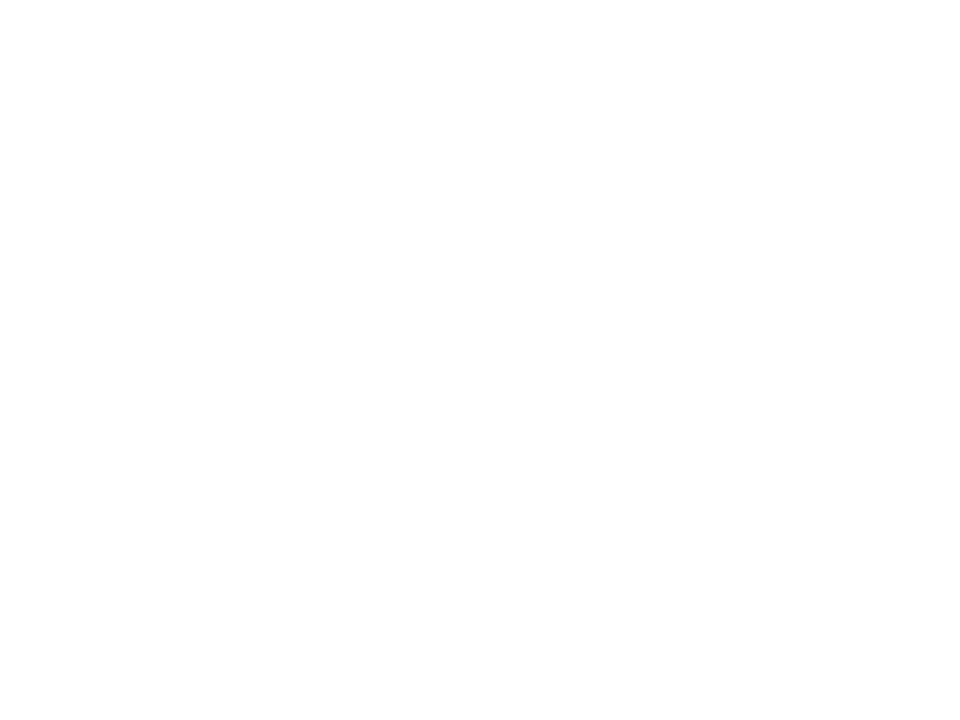

In [6]:

#np.savetxt('./node2vec/emb/'+str(10)+'.emb',i)
x,y= np.loadtxt('./'+str(2)+'/'+'embed.txt',usecols=(0,1),unpack=True)
print(x,y)
#i=ide
#print(i)
#print(i[0])
plt.scatter(x,y,s=1)
#plt.scatter(x[1],y[1],c='r')
#plt.scatter(x[i==4],y[i==4],c='blue')
#plt.scatter(x[i==5],y[i==5],c='g')
#plt.scatter(x[i==6],y[i==6],c='black')
#plt.scatter(x[i==7],y[i==7],c='violet')
#plt.scatter(x[i==10],y[i==10],c='orange')
#plt.scatter(x[i==2],y[i==2],c='grey')

<IPython.core.display.Javascript object>


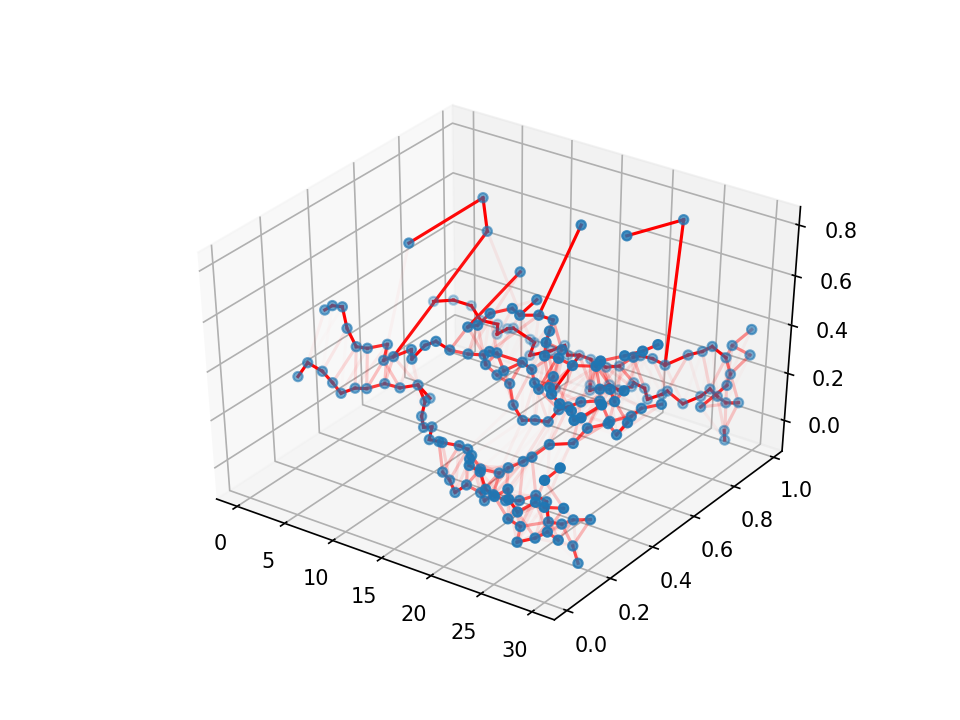

1.0 4.0
[0.4395791583166332, 0.30782763592281226]
1.0 5.0
[0.4395791583166332, 0.47428805879551533]
2.0 6.0
[0.19789579158316634, 0.18804315058912183]
3.0 4.0
[0.23937875751503002, 0.30782763592281226]
4.0 7.0
[0.30782763592281226, 0.27378444474034014]
4.0 9.0
[0.30782763592281226, 0.4812863594362081]
5.0 7.0
[0.47428805879551533, 0.27378444474034014]
5.0 9.0
[0.47428805879551533, 0.4812863594362081]
6.0 8.0
[0.18804315058912183, 0.15399995940664968]
7.0 10.0
[0.27378444474034014, 0.2387929415368763]
7.0 12.0
[0.27378444474034014, 0.42096051649839045]
8.0 11.0
[0.15399995940664968, 0.10500602866731525]
9.0 12.0
[0.4812863594362081, 0.42096051649839045]
10.0 14.0
[0.2387929415368763, 0.21208813078266633]
10.0 15.0
[0.2387929415368763, 0.3616328083525187]
11.0 13.0
[0.10500602866731525, 0.07922197334031525]
12.0 14.0
[0.42096051649839045, 0.21208813078266633]
12.0 15.0
[0.42096051649839045, 0.3616328083525187]
13.0 16.0
[0.07922197334031525, 0.07737640263909061]
14.0 17.0
[0.212088130782

121.0 127.0
[0.2098184948114561, 0.3508196485036291]
121.0 129.0
[0.2098184948114561, 0.19095503159189528]
121.0 130.0
[0.2098184948114561, 0.10127229259811919]
122.0 123.0
[0.5804264114314973, 0.48215630394936926]
122.0 128.0
[0.5804264114314973, 0.5748076527042384]
123.0 135.0
[0.48215630394936926, 0.4917077703615302]
123.0 136.0
[0.48215630394936926, 0.5499116984359601]
123.0 137.0
[0.48215630394936926, 0.37851375513295354]
123.0 138.0
[0.48215630394936926, 0.2919081216222761]
124.0 133.0
[0.12660893863260084, 0.0679059996130753]
124.0 139.0
[0.12660893863260084, 0.26454259838650684]
125.0 131.0
[0.24653898274503516, 0.22669161760313422]
125.0 132.0
[0.24653898274503516, 0.10351402646929464]
125.0 134.0
[0.24653898274503516, 0.11943675082720676]
125.0 137.0
[0.24653898274503516, 0.37851375513295354]
125.0 138.0
[0.24653898274503516, 0.2919081216222761]
126.0 133.0
[0.2461494972100564, 0.0679059996130753]
126.0 139.0
[0.2461494972100564, 0.26454259838650684]
127.0 135.0
[0.3508196485

In [50]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

run=83

x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)



x=x[1:]
y=y[1:]
t=t[1:]

#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'reconstruct.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
id1,id2,w=np.loadtxt('./node2vec/graph/'+str(run)+'.edgelist', delimiter='\t', usecols=(0,1,2), unpack=True)
#print(len(id1))
#id2=id2[id1!=1]
#id1=id1[id1!=1]


xline=[]
yline=[]
tline=[]
for i in range(len(id1)):
    
    xline=[]
    yline=[]
    tline=[]
    
    print(id1[i],id2[i])
    xline.append(x[int(id1[i]-1)])   
    yline.append(y[int(id1[i]-1)])
    tline.append(t[int(id1[i]-1)])
    
    xline.append(x[int(id2[i]-1)])
    yline.append(y[int(id2[i]-1)])
    tline.append(t[int(id2[i]-1)])
    
    print(xline)
    
    ax.plot3D(tline, yline, xline, c='red',alpha=w[i]/100)
    #ax.plot3D(tline, yline, xline, c='grey')


#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#

# Data for three-dimensional scattered points
zdata = x
xdata = t
ydata = y
ax.scatter3D(xdata, ydata, zdata);

#plt.savefig('./TimeGraph.png',dpi=my_dpi,transparent=False) 

blue


<IPython.core.display.Javascript object>


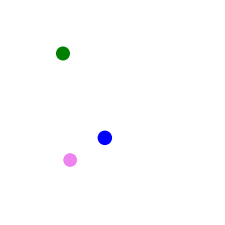

c_full ['blue', 'green', 'violet']
ii 2.0
['blue', 'green', 'violet']
ii 3.0
['blue', 'green', 'violet']
ii 4.0
['blue', 'green', 'violet']


<IPython.core.display.Javascript object>


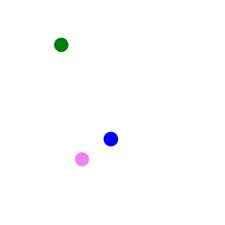

c_full ['blue', 'green', 'violet']
prev_c ['blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet']
c ['green']


<IPython.core.display.Javascript object>


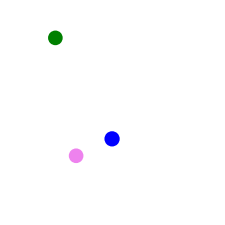

c_full ['violet', 'blue', 'green']
prev_c ['violet' 'blue' 'green']
c ['violet']
prev_c ['violet' 'blue' 'green']
c ['green']
prev_c ['violet' 'blue' 'green']
c ['blue']


<IPython.core.display.Javascript object>


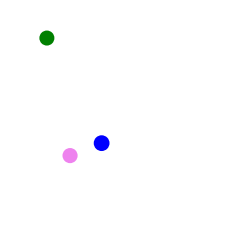

c_full ['violet', 'green', 'blue']
prev_c ['violet' 'green' 'blue']
c ['violet']
prev_c ['violet' 'green' 'blue']
c ['green']
prev_c ['violet' 'green' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


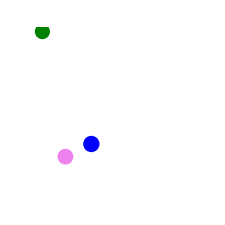

c_full ['violet', 'green', 'blue']
prev_c ['violet' 'green' 'blue']
c ['green']
prev_c ['violet' 'green' 'blue']
c ['violet']
prev_c ['violet' 'green' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


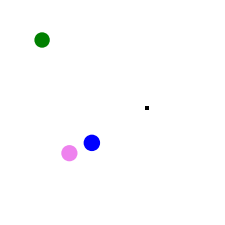

c_full ['green', 'violet', 'blue']
prev_c ['green' 'violet' 'blue']
c ['green']
prev_c ['green' 'violet' 'blue']
c ['violet']
prev_c ['green' 'violet' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


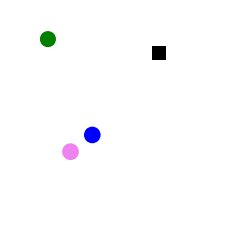

c_full ['green', 'violet', 'blue', 'black']
prev_c ['green' 'violet' 'blue' 'black']
c ['violet']
prev_c ['green' 'violet' 'blue' 'black']
c ['blue']
prev_c ['green' 'violet' 'blue' 'black']
c ['green']


<IPython.core.display.Javascript object>


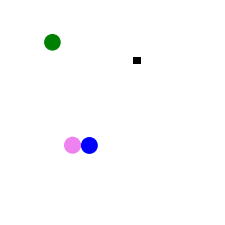

c_full ['black', 'violet', 'blue', 'green']
prev_c ['black' 'violet' 'blue' 'green']
c ['blue']
prev_c ['black' 'violet' 'blue' 'green']
c ['violet']
prev_c ['black' 'violet' 'blue' 'green']
c ['green']


<IPython.core.display.Javascript object>


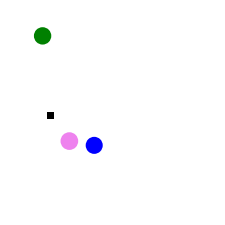

c_full ['blue', 'black', 'violet', 'green']
prev_c ['blue' 'black' 'violet' 'green']
c ['green']
prev_c ['blue' 'black' 'violet' 'green']
c ['blue']
prev_c ['blue' 'black' 'violet' 'green']
c ['violet']


<IPython.core.display.Javascript object>


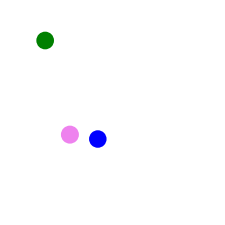

c_full ['black', 'green', 'blue', 'violet']
prev_c ['black' 'green' 'blue' 'violet']
c ['violet']
prev_c ['black' 'green' 'blue' 'violet']
c ['blue']
prev_c ['black' 'green' 'blue' 'violet']
c ['green']


<IPython.core.display.Javascript object>


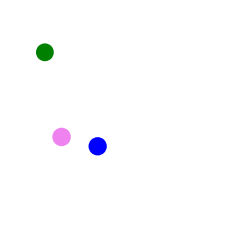

c_full ['violet', 'blue', 'green']
prev_c ['violet' 'blue' 'green']
c ['green']
prev_c ['violet' 'blue' 'green']
c ['violet']
prev_c ['violet' 'blue' 'green']
c ['blue']


<IPython.core.display.Javascript object>


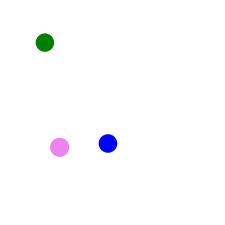

c_full ['green', 'violet', 'blue']
prev_c ['green' 'violet' 'blue']
c ['green']
prev_c ['green' 'violet' 'blue']
c ['violet']
prev_c ['green' 'violet' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


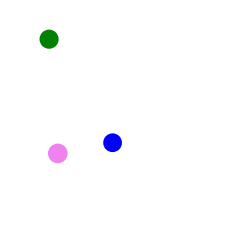

c_full ['green', 'violet', 'blue']
prev_c ['green' 'violet' 'blue']
c ['violet']
prev_c ['green' 'violet' 'blue']
c ['blue']
prev_c ['green' 'violet' 'blue']
c ['green']


<IPython.core.display.Javascript object>


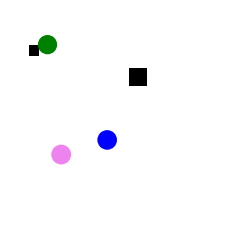

c_full ['violet', 'blue', 'green']
prev_c ['violet' 'blue' 'green']
c ['blue']
prev_c ['violet' 'blue' 'green']
c ['violet']
prev_c ['violet' 'blue' 'green']
c ['green']


<IPython.core.display.Javascript object>


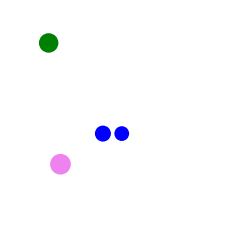

c_full ['black', 'blue', 'violet', 'black', 'green']
prev_c ['black' 'blue' 'violet' 'black' 'green']
c ['green']
prev_c ['black' 'blue' 'violet' 'black' 'green']
c ['blue']
prev_c ['black' 'blue' 'violet' 'black' 'green']
c ['blue']
prev_c ['black' 'blue' 'violet' 'black' 'green']
c ['violet']


<IPython.core.display.Javascript object>


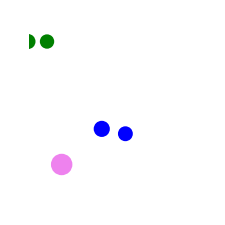

c_full ['green', 'blue', 'blue', 'violet']
prev_c ['green' 'blue' 'blue' 'violet']
c ['blue']
prev_c ['green' 'blue' 'blue' 'violet']
c ['green']
prev_c ['green' 'blue' 'blue' 'violet']
c ['green']
prev_c ['green' 'blue' 'blue' 'violet']
c ['violet']
prev_c ['green' 'blue' 'blue' 'violet']
c ['blue']


<IPython.core.display.Javascript object>


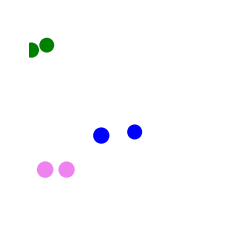

c_full ['blue', 'green', 'green', 'violet', 'blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue']
c ['violet']


<IPython.core.display.Javascript object>


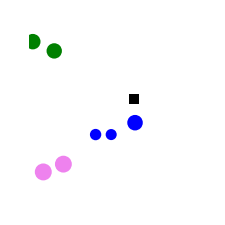

c_full ['violet', 'blue', 'green', 'green', 'blue', 'violet']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['blue']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['blue']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['green']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['blue']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'blue' 'violet']
c ['green']


<IPython.core.display.Javascript object>


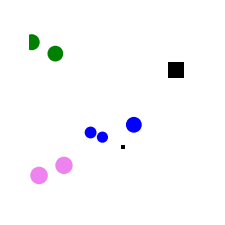

c_full ['blue', 'blue', 'green', 'black', 'blue', 'violet', 'violet', 'green']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'green' 'black' 'blue' 'violet' 'violet' 'green']
c ['blue']


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


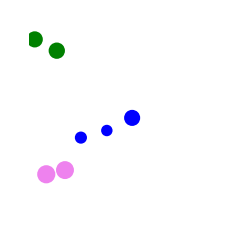

c_full ['blue', 'green', 'green', 'violet', 'blue', 'black', 'violet', 'black', 'blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['violet']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['violet']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['blue']
prev_c ['blue' 'green' 'green' 'violet' 'blue' 'black' 'violet' 'black' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


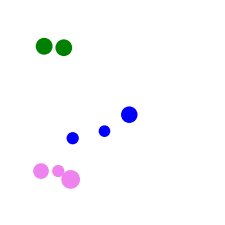

c_full ['green', 'blue', 'green', 'violet', 'violet', 'blue', 'blue']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['blue']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['green']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['blue']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['green']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'blue' 'green' 'violet' 'violet' 'blue' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


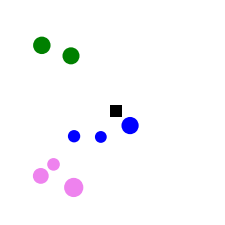

c_full ['blue', 'green', 'violet', 'blue', 'green', 'violet', 'violet', 'blue']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['green']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'blue' 'green' 'violet' 'violet' 'blue']
c ['green']


<IPython.core.display.Javascript object>


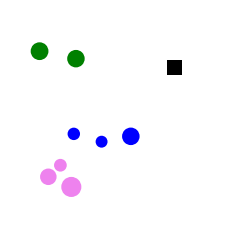

c_full ['black', 'violet', 'blue', 'violet', 'blue', 'violet', 'green', 'blue', 'green']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['green']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['violet']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['violet']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['green']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['violet']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['blue']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['blue']
prev_c ['black' 'violet' 'blue' 'violet' 'blue' 'violet' 'green' 'blue' 'green']
c ['blue']


<IPython.core.display.Javascript object>


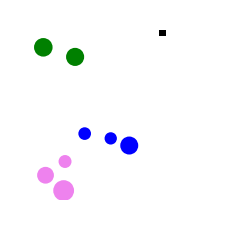

c_full ['black', 'green', 'violet', 'violet', 'green', 'violet', 'blue', 'blue', 'blue']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['blue']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['violet']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['green']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['violet']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['green']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['blue']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['violet']
prev_c ['black' 'green' 'violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue']
c ['blue']


<IPython.core.display.Javascript object>


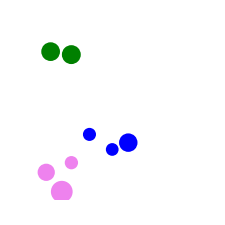

c_full ['blue', 'violet', 'green', 'violet', 'green', 'blue', 'black', 'violet', 'blue']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['green']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['green']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'green' 'blue' 'black' 'violet' 'blue']
c ['violet']


<IPython.core.display.Javascript object>


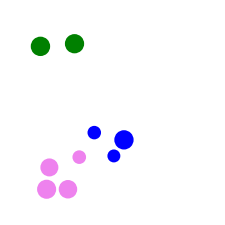

c_full ['blue', 'green', 'violet', 'green', 'blue', 'blue', 'violet', 'violet']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['green']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'blue' 'blue' 'violet' 'violet']
c ['green']


<IPython.core.display.Javascript object>


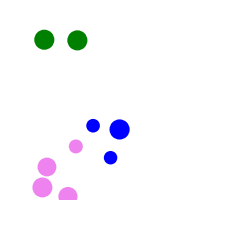

c_full ['violet', 'violet', 'green', 'violet', 'blue', 'blue', 'blue', 'violet', 'green']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['violet']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['violet']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['violet']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['blue']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['violet']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['blue']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['green']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['blue']
prev_c ['violet' 'violet' 'green' 'violet' 'blue' 'blue' 'blue' 'violet' 'green']
c ['green']


<IPython.core.display.Javascript object>


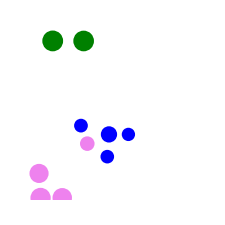

c_full ['violet', 'violet', 'violet', 'blue', 'violet', 'blue', 'green', 'blue', 'green']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['blue']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['green']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['violet']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['green']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['violet']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['blue']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['violet']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['violet']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'green' 'blue' 'green']
c ['blue']
prev_c ['violet' 'violet' 'violet' 'blue' 'violet' 'blue' 'gree

<IPython.core.display.Javascript object>


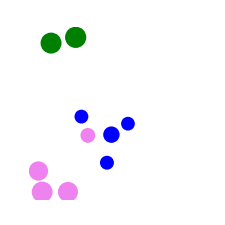

c_full ['blue', 'green', 'violet', 'green', 'violet', 'blue', 'violet', 'violet', 'blue', 'blue']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['green']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['green']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['violet']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue']
c ['blue']
prev_c ['blue' 'green' 'violet' 'green' 'violet' 'blue' 'violet' 'violet' 'blue'
 'blue'

<IPython.core.display.Javascript object>


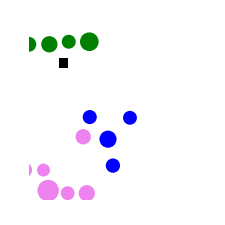

c_full ['blue', 'violet', 'green', 'blue', 'green', 'violet', 'blue', 'blue', 'violet', 'violet']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['blue']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['green']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['green']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['green']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['blue']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'blue' 'green' 'violet' 'blue' 'blue' 'violet'
 'viol

<IPython.core.display.Javascript object>


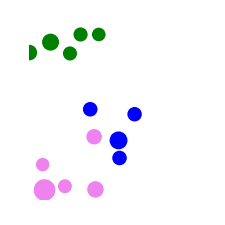

c_full ['violet', 'blue', 'green', 'green', 'violet', 'green', 'blue', 'violet', 'black', 'violet', 'blue', 'violet', 'green', 'violet', 'blue']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']
c ['green']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']
c ['violet']
prev_c ['violet' 'blue' 'green' 'green' 'violet' 'green' 'blue' 'violet' 'black'
 'violet' 'blue' 'violet' 'green' 'violet' 'blue']

In [40]:
def colour_func(ii,prev_c,prev_id,id1,id2):
    id1=id1[id2==ii]
    #print(id1,id2)
    if len(id1)==0:
        print('ii',ii)
        print(prev_c)
        return prev_c[int(ii-2)],False
    if id1==1:
        return 'black',True
    else:
        #print(id1,prev_id,prev_c)
        print('prev_c',np.array(prev_c))
        c_cf=np.array(prev_c)[prev_id==id1[0]]
        print('c',c_cf)
    return c_cf[0],False
    


c=['blue','green','violet']

id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
id=id[1:]
tt=tt[1:]
id_f=[2,3,4]


print(c[id_f==1])


    


for t in range(31):
    
        
    
    my_dpi=96
    pix=150
    
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    print('c_full',c)
    prev_c=c
    prev_id=id_f
    
    c=[]
    id_f=[]
    
    for u in range(len(id[tt==t])):
        x_n=x[int(id[tt==t][u]-1)]  
        y_n=y[int(id[tt==t][u]-1)]
        r_n=r[int(id[tt==t][u]-1)]  
        c_cf,rec=colour_func(id[tt==t][u],prev_c,prev_id,id1,id2)
        c.append(c_cf)
        #print('c.app',c)
        id_f.append(id[tt==t][u])
        if rec:
            rec1=plt.Rectangle((x_n,y_n), r_n, r_n,fc=c_cf,ec=c_cf) 
            ax.add_patch(rec1)
        else:
            circ1=plt.Circle((x_n,y_n), r_n, color=c_cf)
            ax.add_patch(circ1)
        
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.savefig('./'+str(run)+'_GT'+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 

In [ ]:
x_t=[]
for j in range(len(ide)):
    x_t=[]
    x_t.append(x[ide==j])
    print(str(j),x_t)